# project Title : IMDB Movies India

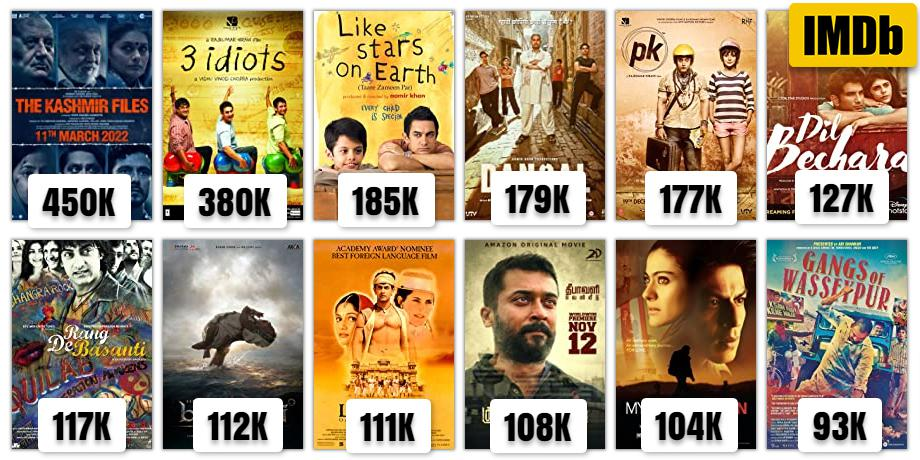

In [4]:
from IPython.display import Image
Image(filename='imdb.jpg')

## Project Overview :.

### This Dataset contains information about Indian Movies listed on IMDB. It contains information about 5659 Indian movies released between 1931 and 2021.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [68]:
# for detect UnicodeDecodeError ( 'latin1' or 'cp1252')
df = pd.read_csv('IMDb Movies India.csv', encoding='cp1252')

## Explor Data

In [70]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [71]:
df.shape

(15509, 10)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [73]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Data cleaning and processing

In [75]:
df = df.drop(['Name','Director','Actor 1','Actor 2','Actor 3','Genre'], axis=1)
df.head()

,Year,Duration,Rating,Votes
0,NaN,NaN,NaN,NaN
1,(2019),109 min,7.0,8
2,(2021),90 min,NaN,NaN
3,(2019),110 min,4.4,35
4,(2010),105 min,NaN,NaN


In [76]:
# remove brackets '()' from Year column
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True)

In [77]:
# remove 'min' from Duration column
df['Duration'] = df['Duration'].str.replace(r'min', '', regex=True)

In [78]:
df.head()

,Year,Duration,Rating,Votes
0,NaN,NaN,NaN,NaN
1,2019,109,7.0,8
2,2021,90,NaN,NaN
3,2019,110,4.4,35
4,2010,105,NaN,NaN


In [79]:
# transform year column to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')   # yyyy-m-d
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year # yyyy

In [80]:
df['Year'].value_counts()

Year
2019.0    410
2021.0    392
2018.0    381
2017.0    360
2005.0    346
         ... 
1917.0      1
1913.0      1
1926.0      1
1914.0      1
1924.0      1
Name: count, Length: 102, dtype: int64

In [81]:
# replace NAN with '2019'
df['Year'] = df['Year'].fillna(2019)

In [82]:
df['Year'].value_counts()

Year
2019.0    938
2021.0    392
2018.0    381
2017.0    360
2005.0    346
         ... 
1917.0      1
1913.0      1
1926.0      1
1914.0      1
1924.0      1
Name: count, Length: 102, dtype: int64

In [83]:
# transform 'Duration' and 'Votes' from object to float
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15509 non-null  float64
 1   Duration  7240 non-null   float64
 2   Rating    7919 non-null   float64
 3   Votes     6548 non-null   float64
dtypes: float64(4)
memory usage: 484.8 KB


In [85]:
# replace nan 

mid=df['Votes'].median()
df['Votes'].fillna(mid,inplace=True)

mid=df['Duration'].median()
df['Duration'].fillna(mid,inplace=True)

mid=df['Rating'].mean()
df['Rating'].fillna(mid,inplace=True)

C:\Users\RPC\AppData\Local\Temp\ipykernel_2876\1459846082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(mid,inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_2876\1459846082.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [86]:
df.isna().sum()

Year        0
Duration    0
Rating      0
Votes       0
dtype: int64

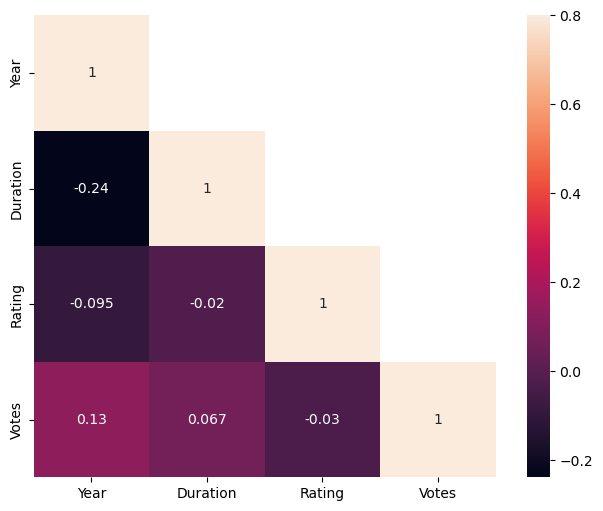

In [87]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

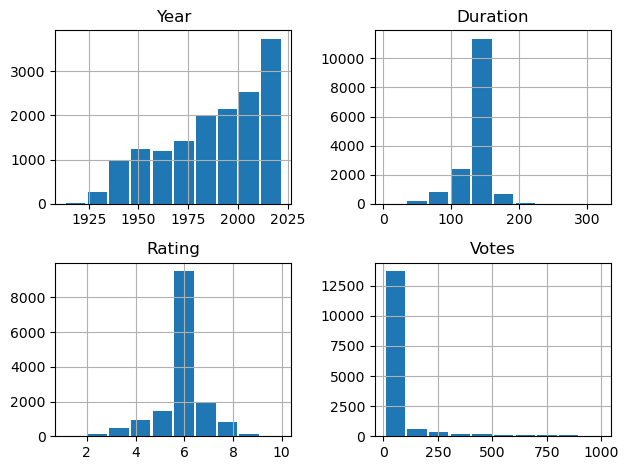

In [88]:
df.hist(rwidth=0.9)
plt.tight_layout()

## Creating Model

In [90]:
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

x=df.drop('Rating',axis=1) 
y=df['Rating']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

score=[]
r_2=[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    SCORE=model.score(x_test,y_test)
    R2 = r2_score(y_test,pred)
    RMSE = math.sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    score.append(SCORE)
    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [91]:
m1=LinearRegression()
m2=XGBRegressor()
m3=RandomForestRegressor()
m4=DecisionTreeRegressor()
m5=SVR()
m6=GradientBoostingRegressor()

In [92]:
reg(m1)
reg(m2)
reg(m3)
reg(m4)
reg(m5)
reg(m6)

In [93]:
Algorithms = ['LinearRegression','XGBRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR','GradientBoostingRegressor']

In [94]:
result=pd.DataFrame({'Algorithms':Algorithms,'Score':score,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,Score,R2,rmse,mae
0,LinearRegression,0.010065,0.010065,0.937729,0.589360
1,XGBRegressor,0.143151,0.143151,0.872421,0.501818
2,RandomForestRegressor,0.070236,0.070236,0.908784,0.518388
3,DecisionTreeRegressor,-0.530844,-0.530844,1.166111,0.658642
4,SVR,0.004605,0.004605,0.940312,0.572508
5,GradientBoostingRegressor,0.216169,0.216169,0.834422,0.503849


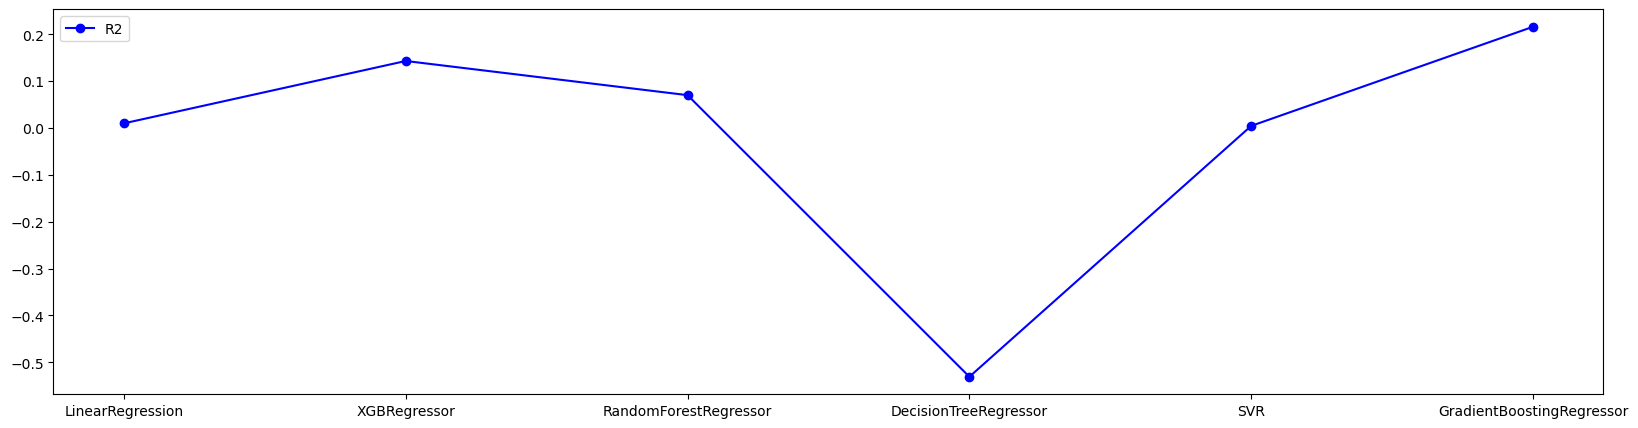

In [95]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(result.Algorithms,result.R2,label='R2',c='b',marker='o')
plt.legend()
plt.show()

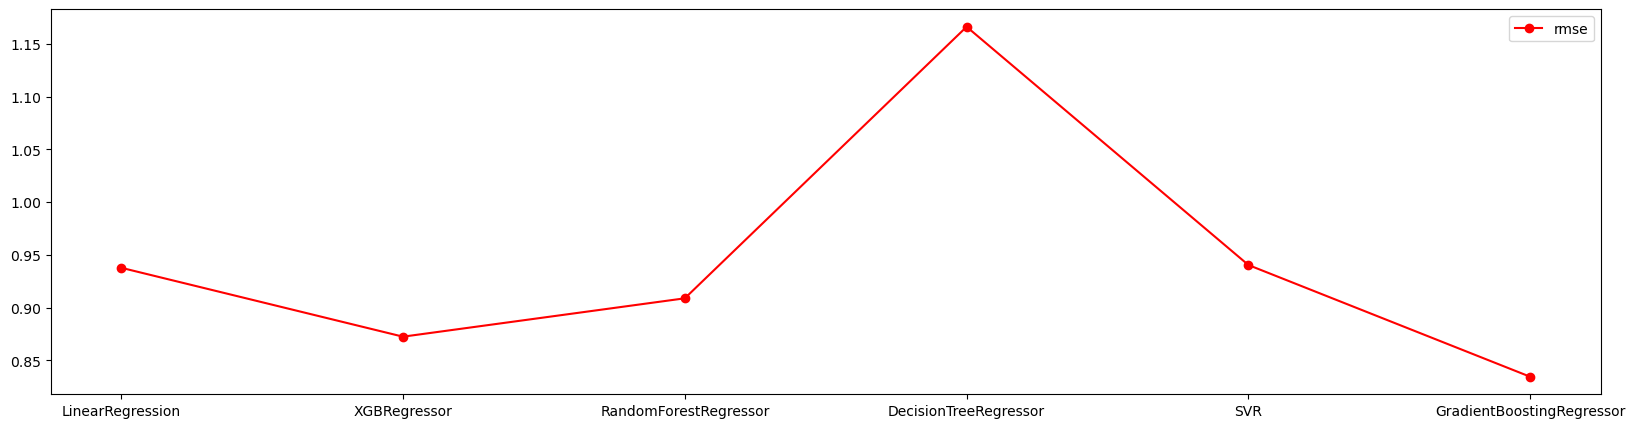

In [96]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(result.Algorithms,result.rmse,label='rmse',c='r',marker='o')
plt.legend()
plt.show()